### EDA Preliminar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4>Se muestran a continuación diversos análsis realizados sobre los datasets para lograr un mejor entendimiento de la información y poder así delinear las estrategias a seguir.

Se trabajó primero con el Dataframe generado a partir del archivo `user.parquet` que contiene las reseñas de los usuarios de **Yelp**

In [2]:
df_user_Yelp = pd.read_csv('c:/Users/PC/Documents/RawDataPF_Henry/Yelp_users_final.csv')

In [3]:
# Seleccionar solo las columnas numéricas relevantes
columns_of_interest = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
                       'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute',
                       'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool',
                       'compliment_funny', 'compliment_writer', 'compliment_photos']
df_numeric = df_user_Yelp[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                    review_count    useful     funny      cool      fans  \
review_count            1.000000  0.620495  0.522736  0.540549  0.492266   
useful                  0.620495  1.000000  0.956912  0.991064  0.602739   
funny                   0.522736  0.956912  1.000000  0.967648  0.554269   
cool                    0.540549  0.991064  0.967648  1.000000  0.561540   
fans                    0.492266  0.602739  0.554269  0.561540  1.000000   
average_stars           0.038206  0.012878  0.008419  0.012738  0.018357   
compliment_hot          0.302174  0.624332  0.672057  0.642451  0.397101   
compliment_more         0.207726  0.405390  0.442675  0.415486  0.229756   
compliment_profile      0.142936  0.323972  0.360419  0.337554  0.167894   
compliment_cute         0.133254  0.260553  0.295445  0.269523  0.193401   
compliment_list         0.102141  0.209216  0.234750  0.215751  0.120748   
compliment_note         0.265486  0.487527  0.492931  0.489068  0.340750   
compliment_p

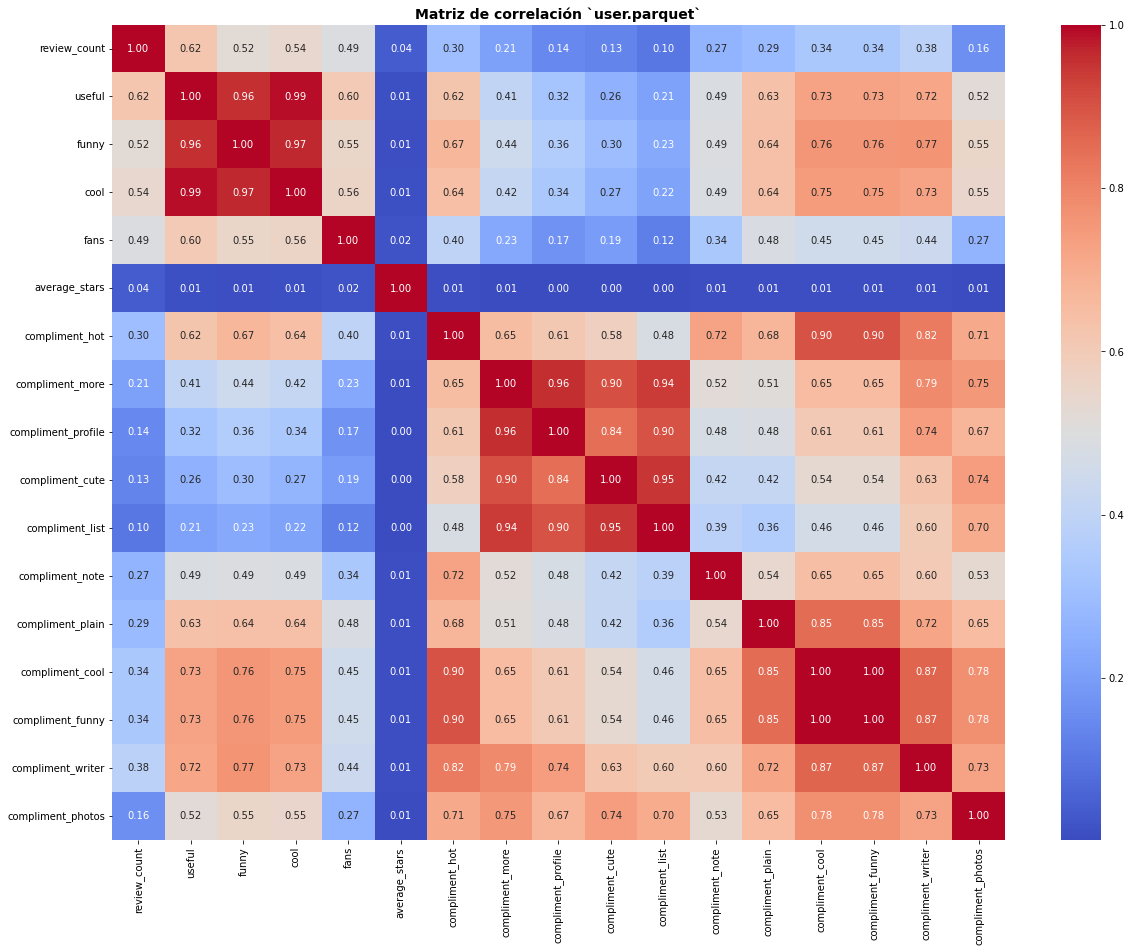

In [4]:
# Crear un heatmap con Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación `user.parquet`', fontsize=14, fontweight='bold')
plt.show()

<h4> Análisis de la Matriz de correlación (Heat Map)

<ol><li> <strong>Columnas con alta correlación positiva entre sí (colores rojizos):</strong> estas columnas se encuentran altamente relacionadas por lo que aportan información redundante. Se sugiere sólo tomar un de entre todas, que mejor se relacione con el parámetro objetivo.</li>
<li>Las columnas <strong>fans</strong> y <strong>review_count</strong> poseen una correlación moderada (cercana al 50%) lo que indica que los usuarios más activos (con más reseñas) tienen también más seguidores.</li>
<li>El promedio de calificación o <strong>average_stars</strong> tiene correlaciones bajas con el resto de las columnas, por lo que podría concluirse que su impacto en un posible sistema de recomendación sería limitado.</li>
<li>Los campos <strong>review_count</strong>, <strong>useful</strong>, <strong>funny</strong>, y <strong>cool</strong> tienen correlaciones moderadamente positivas entre sí. Esto indica que los usuarios que realizan más reseñas tienden a recibir más votos útiles, graciosos y geniales en sus reseñas.</li>
<li>Los campos <strong>compliment_***</strong> están altamente correlacionados entre sí, por lo que miden aspectos similares del comportamiento de los usuarios en esa plataforma.</li>